In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
#!pip install git+https://github.com/pydata/pandas-datareader.git
#!pip install yfinance
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime
from datetime import timedelta,date

#LSTM
#!pip install scikit-learn
#!pip install tensorflow
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import tensorflow as tf
#ARIMA
from statsmodels.tsa.arima_model import ARIMA
import sklearn.metrics as met

hello2

In [2]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN',"TSLA", "VOO", "SPY", "META", "GRAB", "DPLS", "CIBR", "SAGE"]

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN',"TSLA", "VOO", "SPY", "META", "GRAB", "DPLS", "CIBR", "SAGE"]



end = datetime(2022, 3, 11)
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    
tesla_data = globals()['TSLA']


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
company_list = [AAPL, GOOG, MSFT, AMZN, TSLA, VOO, SPY, GRAB, DPLS, CIBR, SAGE]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON", "TESLA","VANGUARD 500", "S&P 500",
                "GRAB", "DARK PULSE", "FIRST TRUST", "SAGE"]

In [4]:
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-02-25,34.049999,36.720001,34.049999,36.650002,36.650002,976100,SAGE
2022-02-28,35.980000,36.889999,35.630001,36.369999,36.369999,718000,SAGE
2022-03-01,36.330002,37.980000,36.220001,36.610001,36.610001,657600,SAGE
2022-03-02,36.619999,37.240002,35.935001,36.119999,36.119999,442600,SAGE
2022-03-03,36.099998,36.180000,34.590000,34.860001,34.860001,401300,SAGE
2022-03-04,34.740002,35.327000,33.689999,33.930000,33.930000,351900,SAGE
2022-03-07,33.840000,34.630001,32.639999,32.730000,32.730000,473200,SAGE
2022-03-08,32.950001,33.320000,31.760000,32.009998,32.009998,402300,SAGE
2022-03-09,32.570000,32.915001,32.000000,32.770000,32.770000,609400,SAGE


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2794 entries, 2021-03-10 to 2022-03-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2794 non-null   float64
 1   High          2794 non-null   float64
 2   Low           2794 non-null   float64
 3   Close         2794 non-null   float64
 4   Adj Close     2794 non-null   float64
 5   Volume        2794 non-null   int64  
 6   company_name  2794 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 174.6+ KB


In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2021-03-10,121.690002,122.169998,119.449997,119.980003,119.271118,111943300,APPLE
2021-03-11,122.540001,123.209999,121.260002,121.959999,121.239410,103026500,APPLE
2021-03-12,120.400002,121.169998,119.160004,121.029999,120.314903,88105100,APPLE
2021-03-15,121.410004,124.000000,120.419998,123.989998,123.257416,92403800,APPLE
2021-03-16,125.699997,127.220001,124.720001,125.570000,124.828079,115227900,APPLE


In [7]:
#file_name = 'Stock.xlsx'
  
# saving the excelsheet
##df.to_excel(file_name)
#print('Stock successfully exported into Excel File')

In [8]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,147.768465,149.351536,146.334645,147.913071,147.496456,8.769481e+07
std,16.985428,17.320117,16.588744,16.943886,17.130688,2.629962e+07
min,119.540001,120.400002,118.860001,119.900002,119.191582,4.100000e+07
25%,133.132496,134.400005,131.855000,133.427502,132.696316,6.904782e+07
50%,147.355003,148.785004,146.159996,147.209999,146.628693,8.360580e+07
75%,161.389996,164.109997,159.054996,161.567497,161.361908,1.006398e+08
max,182.630005,182.940002,179.119995,182.009995,181.778397,1.954327e+08


In [9]:

AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2021-03-10 to 2022-03-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          254 non-null    float64
 1   High          254 non-null    float64
 2   Low           254 non-null    float64
 3   Close         254 non-null    float64
 4   Adj Close     254 non-null    float64
 5   Volume        254 non-null    int64  
 6   company_name  254 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.9+ KB


In [10]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,2646.217763,2670.364534,2620.899231,2645.777563,2645.777563,1.271606e+06
std,261.780863,262.682642,256.940098,258.625534,258.625534,5.069704e+05
min,2027.880005,2050.989990,2010.729980,2035.550049,2035.550049,5.933000e+05
25%,2494.756287,2507.750000,2484.081787,2495.129944,2495.129944,9.431000e+05
50%,2720.285034,2745.135010,2690.547485,2723.609985,2723.609985,1.164550e+06
75%,2862.335022,2885.717468,2829.267517,2852.922485,2852.922485,1.429500e+06
max,3037.270020,3042.000000,2997.750000,3014.179932,3014.179932,4.487500e+06


In [11]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2021-03-10 to 2022-03-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          254 non-null    float64
 1   High          254 non-null    float64
 2   Low           254 non-null    float64
 3   Close         254 non-null    float64
 4   Adj Close     254 non-null    float64
 5   Volume        254 non-null    int64  
 6   company_name  254 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.9+ KB


In [12]:
MSFT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,288.519409,291.107992,285.747835,288.586102,287.350952,2.796684e+07
std,31.262278,31.487920,30.597228,31.010461,31.386568,1.068110e+07
min,230.270004,232.470001,229.350006,230.350006,228.488876,1.390020e+07
25%,259.417496,261.120003,257.352493,259.597504,258.042465,2.103545e+07
50%,292.120010,294.904999,288.225006,292.865005,291.268982,2.543235e+07
75%,309.040009,310.969994,304.517502,308.205009,307.007385,3.240502e+07
max,344.619995,349.670013,342.200012,343.109985,342.402008,9.042890e+07


In [13]:
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2021-03-10 to 2022-03-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          254 non-null    float64
 1   High          254 non-null    float64
 2   Low           254 non-null    float64
 3   Close         254 non-null    float64
 4   Adj Close     254 non-null    float64
 5   Volume        254 non-null    int64  
 6   company_name  254 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.9+ KB


In [14]:
AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,3318.983706,3354.275548,3280.872797,3316.368944,3316.368944,3.437887e+06
std,197.301640,194.385695,202.812399,199.420024,199.420024,1.412797e+06
min,2733.669922,2805.000000,2671.449951,2720.290039,2720.290039,1.680300e+06
25%,3204.297485,3236.469971,3184.007507,3219.237427,3219.237427,2.563975e+06
50%,3342.165039,3368.664917,3303.854980,3335.119995,3335.119995,3.142750e+06
75%,3451.909973,3483.157532,3412.632507,3447.789917,3447.789917,3.830775e+06
max,3744.000000,3773.080078,3696.790039,3731.409912,3731.409912,1.267280e+07


In [15]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2021-03-10 to 2022-03-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          254 non-null    float64
 1   High          254 non-null    float64
 2   Low           254 non-null    float64
 3   Close         254 non-null    float64
 4   Adj Close     254 non-null    float64
 5   Volume        254 non-null    int64  
 6   company_name  254 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.9+ KB


In [16]:
VOO.describe()

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,402.355276,404.390316,400.099962,402.413819,400.119093,5.393944e+06
std,19.982165,19.927861,19.722623,19.761784,20.873315,3.025567e+06
min,356.079987,359.839996,354.140015,357.420013,352.507782,1.984400e+06
25%,387.774994,388.827492,385.514999,387.849998,384.066338,3.393925e+06
50%,403.074997,405.389999,400.860001,402.919998,401.079788,4.409950e+06
75%,416.502487,418.855011,414.687508,416.525009,414.924042,6.473825e+06
max,440.579987,441.260010,437.660004,439.250000,439.250000,2.297070e+07


In [17]:
VOO.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2021-03-10 to 2022-03-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          254 non-null    float64
 1   High          254 non-null    float64
 2   Low           254 non-null    float64
 3   Close         254 non-null    float64
 4   Adj Close     254 non-null    float64
 5   Volume        254 non-null    int64  
 6   company_name  254 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.9+ KB


In [18]:
TSLA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,806.889449,824.251769,788.125395,806.523462,806.523462,2.599895e+07
std,173.600061,179.577577,165.534908,172.607575,172.607575,9.587267e+06
min,552.549988,566.210022,546.979980,563.460022,563.460022,9.800600e+06
25%,675.184998,687.630005,660.704971,671.194977,671.194977,1.896752e+07
50%,741.250000,754.119995,730.904999,743.559998,743.559998,2.433985e+07
75%,927.082489,945.655014,903.085022,930.937500,930.937500,3.108402e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,6.285210e+07


In [19]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2021-03-10 to 2022-03-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          254 non-null    float64
 1   High          254 non-null    float64
 2   Low           254 non-null    float64
 3   Close         254 non-null    float64
 4   Adj Close     254 non-null    float64
 5   Volume        254 non-null    int64  
 6   company_name  254 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.9+ KB


In [20]:
SPY.describe()

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,437.512836,439.780669,435.010984,437.589843,433.954121,8.181373e+07
std,21.782937,21.707850,21.483397,21.542421,22.573473,3.481897e+07
min,385.980011,390.549988,383.899994,387.519989,382.486633,3.484850e+07
25%,421.145004,422.945007,419.297508,421.724998,416.629822,5.597288e+07
50%,438.415009,440.654999,435.664993,437.935013,434.975769,7.279200e+07
75%,453.025002,455.217499,451.039993,453.047493,449.987305,1.011141e+08
max,479.220001,479.980011,476.059998,477.709991,476.230530,2.517839e+08


In [21]:
SPY.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2021-03-10 to 2022-03-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          254 non-null    float64
 1   High          254 non-null    float64
 2   Low           254 non-null    float64
 3   Close         254 non-null    float64
 4   Adj Close     254 non-null    float64
 5   Volume        254 non-null    int64  
 6   company_name  254 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.9+ KB


In [22]:
GRAB.describe()

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,10.319543,10.586500,9.977031,10.256457,10.256457,8.493895e+06
std,2.816542,2.929517,2.703777,2.815695,2.815695,1.748324e+07
min,3.165000,3.360000,2.980000,3.140000,3.140000,1.215000e+05
25%,8.740000,9.007500,8.155000,8.775000,8.775000,4.594000e+05
50%,10.870000,11.022500,10.660000,10.785000,10.785000,1.368100e+06
75%,11.980000,12.237500,11.675000,11.840000,11.840000,8.941650e+06
max,16.910000,17.150000,15.220000,17.059999,17.059999,1.788307e+08


In [23]:
GRAB.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2021-03-10 to 2022-03-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          254 non-null    float64
 1   High          254 non-null    float64
 2   Low           254 non-null    float64
 3   Close         254 non-null    float64
 4   Adj Close     254 non-null    float64
 5   Volume        254 non-null    int64  
 6   company_name  254 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.9+ KB


In [24]:
DPLS.describe()

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,0.067766,0.071996,0.062188,0.066816,0.066816,5.545228e+07
std,0.040607,0.043273,0.036752,0.039731,0.039731,6.022510e+07
min,0.009000,0.009600,0.007000,0.008900,0.008900,8.196454e+06
25%,0.023925,0.026237,0.021700,0.024875,0.024875,2.171851e+07
50%,0.071900,0.074850,0.066000,0.070300,0.070300,3.394319e+07
75%,0.097000,0.100675,0.090075,0.094675,0.094675,5.997701e+07
max,0.185000,0.202000,0.156000,0.174900,0.174900,4.316337e+08


In [25]:
DPLS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2021-03-10 to 2022-03-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          254 non-null    float64
 1   High          254 non-null    float64
 2   Low           254 non-null    float64
 3   Close         254 non-null    float64
 4   Adj Close     254 non-null    float64
 5   Volume        254 non-null    int64  
 6   company_name  254 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.9+ KB


In [26]:
CIBR.describe()

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,48.298216,48.700311,47.829579,48.293937,48.080576,8.172457e+05
std,3.740987,3.721547,3.686097,3.699104,3.700281,5.831611e+05
min,41.060001,41.386002,40.660000,41.230000,40.980034,2.231000e+05
25%,45.150000,45.597500,44.634999,45.010000,44.919564,4.835500e+05
50%,48.504999,48.945000,48.000000,48.530001,48.428844,6.732000e+05
75%,51.012501,51.384999,50.535998,51.022499,50.816506,9.508750e+05
max,56.150002,56.583000,55.599998,56.110001,55.809048,5.282700e+06


In [27]:
CIBR.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2021-03-10 to 2022-03-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          254 non-null    float64
 1   High          254 non-null    float64
 2   Low           254 non-null    float64
 3   Close         254 non-null    float64
 4   Adj Close     254 non-null    float64
 5   Volume        254 non-null    int64  
 6   company_name  254 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.9+ KB


In [28]:
SAGE.describe()

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,51.727862,52.866311,50.548626,51.608740,51.608740,6.161295e+05
std,14.597604,14.961031,14.194496,14.537918,14.537918,6.610407e+05
min,31.000000,32.790001,31.000000,32.009998,32.009998,1.797000e+05
25%,41.370001,42.404249,40.480000,41.432500,41.432500,3.716750e+05
50%,44.922501,45.705000,44.144999,44.830000,44.830000,4.740000e+05
75%,68.552502,70.177250,67.672499,68.455002,68.455002,6.483750e+05
max,80.849998,81.980003,77.769997,79.900002,79.900002,8.591600e+06


In [29]:
SAGE.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2021-03-10 to 2022-03-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          254 non-null    float64
 1   High          254 non-null    float64
 2   Low           254 non-null    float64
 3   Close         254 non-null    float64
 4   Adj Close     254 non-null    float64
 5   Volume        254 non-null    int64  
 6   company_name  254 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.9+ KB


In [30]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2021-03-10,121.690002,122.169998,119.449997,119.980003,119.271118,111943300,APPLE
2021-03-11,122.540001,123.209999,121.260002,121.959999,121.239410,103026500,APPLE
2021-03-12,120.400002,121.169998,119.160004,121.029999,120.314903,88105100,APPLE
2021-03-15,121.410004,124.000000,120.419998,123.989998,123.257416,92403800,APPLE
2021-03-16,125.699997,127.220001,124.720001,125.570000,124.828079,115227900,APPLE


In [31]:
df["High-Low"] = df["High"]-df["Low"]

In [32]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name,High-Low
Date,,,,,,,,
2021-03-10,121.690002,122.169998,119.449997,119.980003,119.271118,111943300,APPLE,2.720001
2021-03-11,122.540001,123.209999,121.260002,121.959999,121.239410,103026500,APPLE,1.949997
2021-03-12,120.400002,121.169998,119.160004,121.029999,120.314903,88105100,APPLE,2.009995
2021-03-15,121.410004,124.000000,120.419998,123.989998,123.257416,92403800,APPLE,3.580002
2021-03-16,125.699997,127.220001,124.720001,125.570000,124.828079,115227900,APPLE,2.500000


In [33]:
#df=df.drop(columns = ['Hight-Low'])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2794 entries, 2021-03-10 to 2022-03-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2794 non-null   float64
 1   High          2794 non-null   float64
 2   Low           2794 non-null   float64
 3   Close         2794 non-null   float64
 4   Adj Close     2794 non-null   float64
 5   Volume        2794 non-null   int64  
 6   company_name  2794 non-null   object 
 7   High-Low      2794 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 196.5+ KB


<AxesSubplot:xlabel='Volume', ylabel='company_name'>

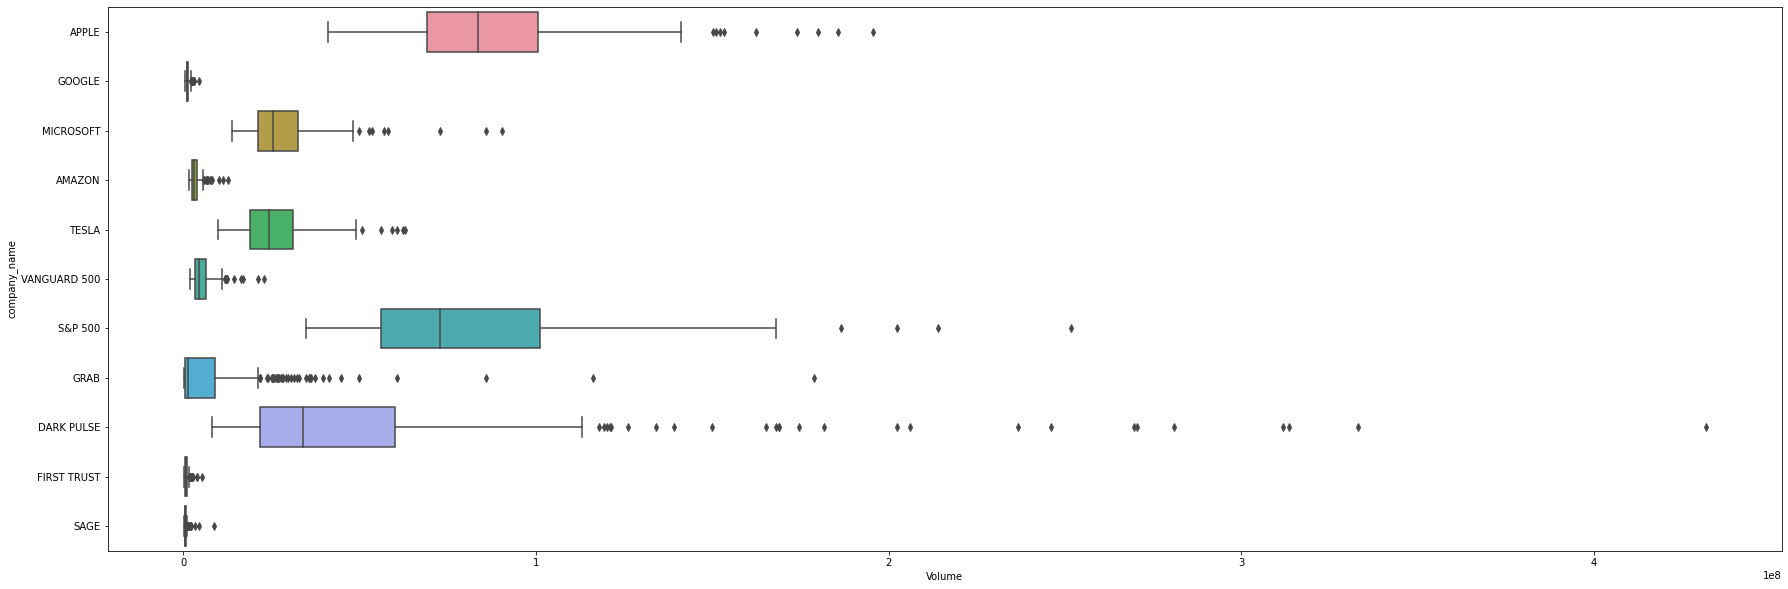

In [35]:
plt.figure(figsize=(30,10))
sns.boxplot(x=df["Volume"],y=df["company_name"],data =df)

In [36]:
tesla_df = df[df['company_name']=='TESLA'] #not require in function

In [37]:
len(tesla_df)

254

In [38]:
tesla_df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name,High-Low
Date,,,,,,,,
2021-03-10,700.299988,717.849976,655.059998,668.059998,668.059998,60605700,TESLA,62.789978
2021-03-11,699.400024,702.500000,677.179993,699.599976,699.599976,36253900,TESLA,25.320007
2021-03-12,670.000000,694.880005,666.140015,693.729980,693.729980,33583800,TESLA,28.739990
2021-03-15,694.090027,713.179993,684.039978,707.940002,707.940002,29335600,TESLA,29.140015
2021-03-16,703.349976,707.919983,671.000000,676.880005,676.880005,32195700,TESLA,36.919983


<AxesSubplot:xlabel='Volume', ylabel='company_name'>

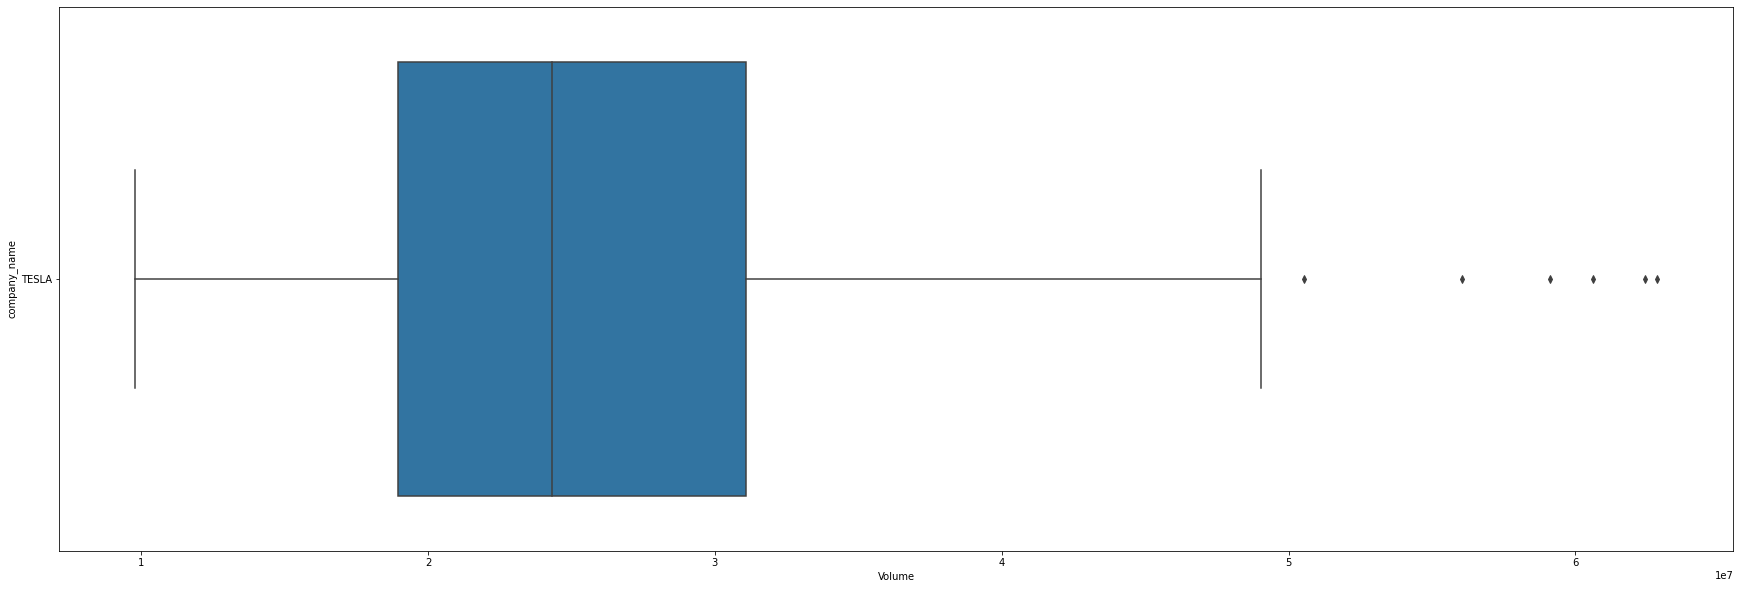

In [39]:
plt.figure(figsize=(30,10))
sns.boxplot(x=tesla_df["Volume"],y=tesla_df["company_name"],data =df)

In [40]:
tesla_df["company_name"].value_counts()

TESLA    254
Name: company_name, dtype: int64

<AxesSubplot:>

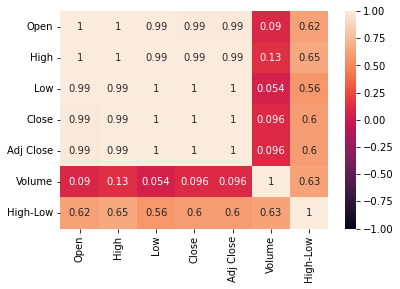

In [41]:
sns.heatmap(tesla_df.corr(), annot = True,vmin=-1, vmax=1)

### Large number of 1s and values close to 1 as variables show high positive correlations and are interrelated. This might be because of the minute difference between those values. However, in reality these small values play a huge role 

In [42]:
# Transform data to include useful columns to use later on
tesla_data['Open-high'] = tesla_data['Open']-tesla_data['High']
tesla_data['Open-low'] = tesla_data['Open'] - tesla_data['Low']
tesla_data['Close-high'] = tesla_data['Close']-tesla_data['High']
tesla_data['Close-low'] = tesla_data['Close'] - tesla_data['Low']
tesla_data['High-low'] = tesla_data['High'] - tesla_data['Low']
tesla_data['Open-close'] = tesla_data['Open'] - tesla_data['Close']


In [43]:
print(len(tesla_data))
tesla_data['DateTime'] = tesla_data.index
tesla_data['New_ID'] = range(1, 1+len(tesla_data))
tesla_data.index = tesla_data['New_ID']
tesla_data= tesla_data.drop(['New_ID'],axis=1)
ma_day = [30, 50]
for ma in ma_day:
    column_name = f"MovingAvg_{ma}"
    tesla_data[column_name] = tesla_data['Close'].rolling(ma).mean()
print(len(tesla_data))
for ma in ma_day:
    column_name = f"MovingAvg_{ma}"
    column_df = pd.DataFrame(tesla_data[column_name])
    date = datetime(2021, 3, 10)
    for day in range(1,ma+1):
        _ = tesla_data.head(day)['Close']
        avg = sum(_)/(day)
        tesla_data.at[day,column_name] = avg
        


# tesla_data.index = [i for i in range(1,255)]
print(len(tesla_data))
tesla_data.index = tesla_data['DateTime'] #change back index to date time for ML 
tesla_data= tesla_data.drop(['DateTime'],axis=1) #drop
tesla_data.head(10)
# tesla_data.tail(10)

#         print(avg)
#         tesla_data[column_name] = tesla_data[column_name].replace(np.nan, avg)
# tesla_data.head(30)

254
254
254


,Open,High,Low,Close,Adj Close,Volume,company_name,Open-high,Open-low,Close-high,Close-low,High-low,Open-close,MovingAvg_30,MovingAvg_50
DateTime,,,,,,,,,,,,,,,
2021-03-10,700.299988,717.849976,655.059998,668.059998,668.059998,60605700,TESLA,-17.549988,45.239990,-49.789978,13.000000,62.789978,32.239990,668.059998,668.059998
2021-03-11,699.400024,702.500000,677.179993,699.599976,699.599976,36253900,TESLA,-3.099976,22.220032,-2.900024,22.419983,25.320007,-0.199951,683.829987,683.829987
2021-03-12,670.000000,694.880005,666.140015,693.729980,693.729980,33583800,TESLA,-24.880005,3.859985,-1.150024,27.589966,28.739990,-23.729980,687.129985,687.129985
2021-03-15,694.090027,713.179993,684.039978,707.940002,707.940002,29335600,TESLA,-19.089966,10.050049,-5.239990,23.900024,29.140015,-13.849976,692.332489,692.332489
2021-03-16,703.349976,707.919983,671.000000,676.880005,676.880005,32195700,TESLA,-4.570007,32.349976,-31.039978,5.880005,36.919983,26.469971,689.241992,689.241992
2021-03-17,656.869995,703.729980,651.010010,701.809998,701.809998,40372500,TESLA,-46.859985,5.859985,-1.919983,50.799988,52.719971,-44.940002,691.336660,691.336660
2021-03-18,684.289978,689.229980,652.000000,653.159973,653.159973,33224800,TESLA,-4.940002,32.289978,-36.070007,1.159973,37.229980,31.130005,685.882847,685.882847
2021-03-19,646.599976,657.229980,624.619995,654.869995,654.869995,42894000,TESLA,-10.630005,21.979980,-2.359985,30.250000,32.609985,-8.270020,682.006241,682.006241
2021-03-22,684.590027,699.619995,668.750000,670.000000,670.000000,39512200,TESLA,-15.029968,15.840027,-29.619995,1.250000,30.869995,14.590027,680.672214,680.672214


### Accounted for weekends, but not public holidays

<AxesSubplot:>

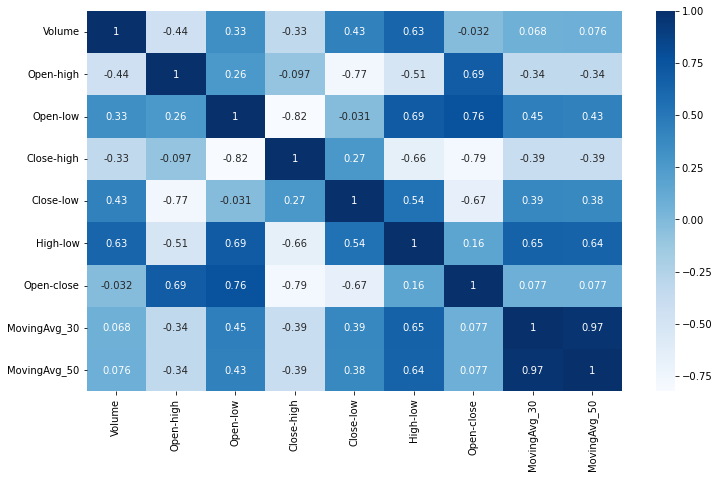

In [44]:
# drop old useless columns
tesla_transform_data = tesla_data.copy()
tesla_transform_data = tesla_transform_data.drop(['Open','High','Low','Close', 'Adj Close'],axis=1)
tesla_transform_df = pd.DataFrame(tesla_transform_data)
tesla_transform_df.head()
plt.figure(figsize=(12,7))
sns.heatmap(tesla_transform_df.corr(),cmap='Blues',annot=True)

<AxesSubplot:xlabel='High-low', ylabel='Volume'>

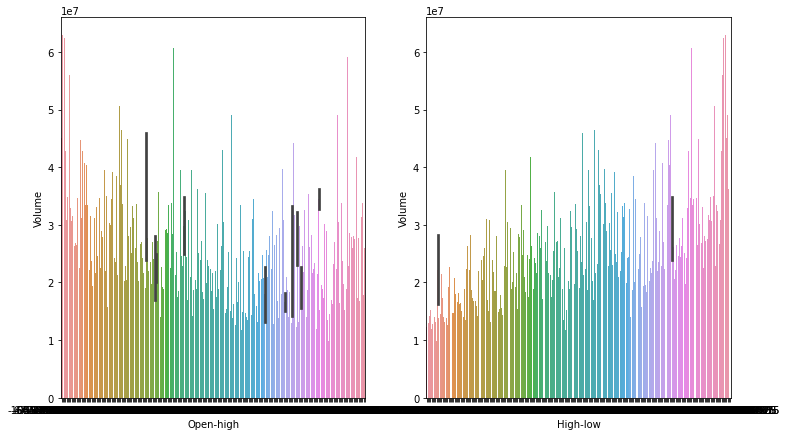

In [45]:
f, axes = plt.subplots(1, 2, figsize=(12,7))

# count = 0
# for var in numeric_df:
#     sb.boxplot(data = numeric_df[var], orient = "h", ax = axes[count,0])
#     sb.histplot(data = numeric_df[var], ax = axes[count,1])
#     sb.violinplot(data = numeric_df[var], orient = "h", ax = axes[count,2])
#     count += 1
sns.barplot(data=tesla_transform_df, x = "Open-high", y="Volume", ax=axes[0])
sns.barplot(data=tesla_transform_df, x = "High-low", y="Volume", ax=axes[1])

In [46]:

plt.style.use('fivethirtyeight')

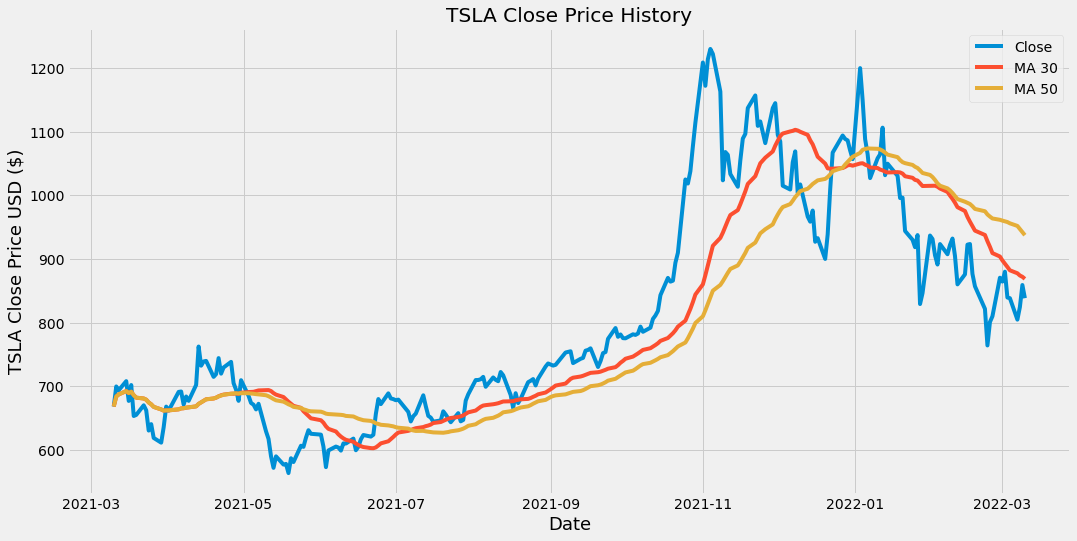

In [47]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title("TSLA Close Price History")
plt.xlabel('Date',fontsize=18)
plt.ylabel("TSLA Close Price USD ($)",fontsize=18)

plt.plot(tesla_data['Close'],label = "Close Price")
plt.plot(tesla_data['MovingAvg_30'],label ="MA 30")
plt.plot(tesla_data['MovingAvg_50'],label ="MA 50")
plt.legend(['Close','MA 30','MA 50'])
plt.show()

In [48]:
#Create a new dataframe with only the 'Close column'
data = tesla_data.filter(['Close'])

#Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train the model on (80% of data that we have)
training_data_len = math.ceil(len(dataset)*.8) #Math.ceil to round up

training_data_len

204

In [49]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))

#Computes min and max value to be used for scaling, then transforms the data based on the min max values
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.15695097],
       [0.20427632],
       [0.19546846],
       [0.21679042],
       [0.17018528],
       [0.20759243],
       [0.13459367],
       [0.13715953],
       [0.15986192],
       [0.14809806],
       [0.10024757],
       [0.1154325 ],
       [0.08290194],
       [0.07176826],
       [0.10827515],
       [0.1567559 ],
       [0.1474829 ],
       [0.19144717],
       [0.19230245],
       [0.16131735],
       [0.18056863],
       [0.17039537],
       [0.20784748],
       [0.29838695],
       [0.25323724],
       [0.26317046],
       [0.26456599],
       [0.22682869],
       [0.23337079],
       [0.27107806],
       [0.23442115],
       [0.24899092],
       [0.26219519],
       [0.21198884],
       [0.19647385],
       [0.17036533],
       [0.21904116],
       [0.18221922],
       [0.16526364],
       [0.16127238],
       [0.15016874],
       [0.16341807],
       [0.09840191],
       [0.08063619],
       [0.03965788],
       [0.01234898],
       [0.03943277],
       [0.020

In [50]:
#Create the training data set
prediction_days = 60

#Create a scaled training data set, 0 up to 80% of allocated data
train_data = scaled_data[0:training_data_len, :]

#Split the data into x_train and y_train data sets
#Independent training variable, list of 60 closing prices that is going to be used to predict next day closing price in y_train
x_train = []
#Dependent training variable, list of next day closing prices corresponding to each list in x_train to be predicted by LSTM
y_train = [] 

#Append past 60 values of the train_data
for i in range(prediction_days, len(train_data)):
    x_train.append(train_data[i-prediction_days:i, 0]) 
    y_train.append(train_data[i,0]) 
    
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [51]:
#Reshape the data, as LSTM requires a 3-dimensional input
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(144, 60, 1)

In [52]:
x_train

array([[[0.15695097],
        [0.20427632],
        [0.19546846],
        ...,
        [0.09068948],
        [0.06251027],
        [0.01407458]],

       [[0.20427632],
        [0.19546846],
        [0.21679042],
        ...,
        [0.06251027],
        [0.01407458],
        [0.0534023 ]],

       [[0.19546846],
        [0.21679042],
        [0.17018528],
        ...,
        [0.01407458],
        [0.0534023 ],
        [0.06252529]],

       ...,

       [[0.32688119],
        [0.31813333],
        [0.31774318],
        ...,
        [0.50488405],
        [0.56278791],
        [0.66833216]],

       [[0.31813333],
        [0.31774318],
        [0.32721135],
        ...,
        [0.56278791],
        [0.66833216],
        [0.75555551]],

       [[0.31774318],
        [0.32721135],
        [0.32580089],
        ...,
        [0.66833216],
        [0.75555551],
        [0.79597856]]])

In [53]:
#Building the LSTM model
model = Sequential()

#First LSTM layer, giving it 50 neurons and return_sequences=True as we need to add another LSTM layer
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
#Second LSTM layer
model.add(LSTM(50, return_sequences=False))
#Dense layer with 25 neurons
model.add(Dense(25))
#Dense layer with 1 neuron
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [54]:
#Training the LSTM model
model.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
5/5 [==============================] - 2s 27ms/step - loss: 0.1164
Epoch 2/100
5/5 [==============================] - 0s 28ms/step - loss: 0.0348
Epoch 3/100
5/5 [==============================] - 0s 27ms/step - loss: 0.0165
Epoch 4/100
5/5 [==============================] - 0s 27ms/step - loss: 0.0204
Epoch 5/100
5/5 [==============================] - 0s 28ms/step - loss: 0.0139
Epoch 6/100
5/5 [==============================] - 0s 28ms/step - loss: 0.0125
Epoch 7/100
5/5 [==============================] - 0s 28ms/step - loss: 0.0114
Epoch 8/100
5/5 [==============================] - 0s 28ms/step - loss: 0.0099
Epoch 9/100
5/5 [==============================] - 0s 28ms/step - loss: 0.0099
Epoch 10/100
5/5 [==============================] - 0s 27ms/step - loss: 0.0092
Epoch 11/100
5/5 [==============================] - 0s 27ms/step - loss: 0.0090
Epoch 12/100
5/5 [==============================] - 0s 28ms/step - loss: 0.0089
Epoch 13/100
5/5 [==============================]

In [55]:
#Create the testing data set

#Creating new array contained scaled values 
test_data = scaled_data[training_data_len - prediction_days: , :]


x_test = []
y_test = dataset[training_data_len: , :] #Containing values our model want to predict

for i in range(prediction_days, len(test_data)):
    x_test.append(test_data[i-prediction_days:i,0])#Append the past 60 values to test dataset
    
#Converting into numpy array to use in LSTM model
x_test = np.array(x_test)

In [56]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(50, 60, 1)

In [57]:
#Get the predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [58]:
#Getting RMSE to see how accurate the LSTM model is in predicting the closing price
LSTM_RMSE = np.sqrt(((predictions - y_test) ** 2).mean())

LSTMr2=met.r2_score(y_test,predictions)
print('Testing Root Mean Squared Error is {}'.format(LSTM_RMSE))
print('Testing R Squared is {}'.format(LSTMr2))

Testing Root Mean Squared Error is 61.651275551675845
Testing R Squared is 0.6309420502185135


In [60]:

predictions

array([[1128.4589 ],
       [1122.7635 ],
       [1097.7494 ],
       [1067.8893 ],
       [1115.3085 ],
       [1136.0804 ],
       [1109.1351 ],
       [1070.9408 ],
       [1032.0709 ],
       [1029.038  ],
       [1043.5522 ],
       [1079.336  ],
       [1072.4084 ],
       [1067.     ],
       [1055.5576 ],
       [1032.6897 ],
       [1018.51404],
       [ 991.78186],
       [ 970.0658 ],
       [ 956.34863],
       [ 960.3512 ],
       [ 926.8713 ],
       [ 905.61456],
       [ 930.5622 ],
       [ 958.9887 ],
       [ 968.7393 ],
       [ 962.78564],
       [ 965.45935],
       [ 961.6404 ],
       [ 962.0784 ],
       [ 966.491  ],
       [ 958.75446],
       [ 932.71783],
       [ 917.22107],
       [ 928.43915],
       [ 945.01715],
       [ 940.0496 ],
       [ 923.5781 ],
       [ 896.65027],
       [ 856.7399 ],
       [ 840.1852 ],
       [ 839.90204],
       [ 866.9984 ],
       [ 893.8661 ],
       [ 918.40735],
       [ 918.5499 ],
       [ 909.03284],
       [ 885.

C:\Users\User\AppData\Local\Temp\ipykernel_19888\1590373275.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LSTM['Predicted']=predictions
C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


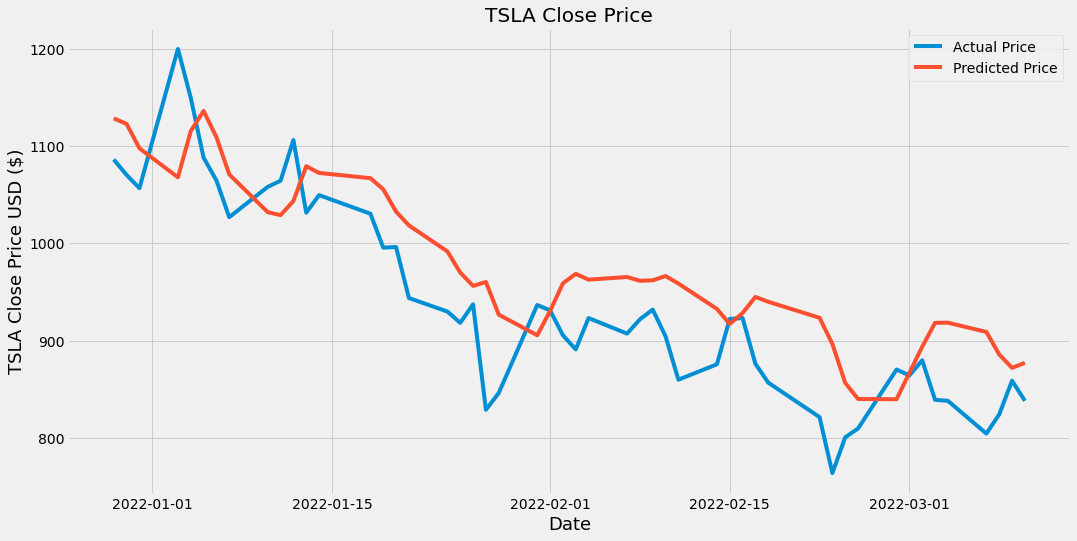

In [71]:
#Plot the data
train = data[:training_data_len]
LSTM = data[training_data_len:]
LSTM['Predicted']=predictions
LSTM.rename(columns={'Close':'Actual'},inplace = True)
LSTM
#Visualise the model
plt.figure(figsize=(16,8))
plt.title("TSLA Close Price")
plt.xlabel('Date',fontsize=18)
plt.ylabel("TSLA Close Price USD ($)",fontsize=18)

#plt.plot(train['Close']) 
plt.plot(LSTM[['Actual','Predicted']])
plt.legend(['Actual Price','Predicted Price'])

In [72]:
LSTM

,Actual,Predicted
DateTime,,
2021-12-29,1086.189941,1128.458862
2021-12-30,1070.339966,1122.763550
2021-12-31,1056.780029,1097.749390
2022-01-03,1199.780029,1067.889282
2022-01-04,1149.589966,1115.308472
2022-01-05,1088.119995,1136.080444
2022-01-06,1064.699951,1109.135132
2022-01-07,1026.959961,1070.940796
2022-01-10,1058.119995,1032.070923


In [ ]:
tesla_data

In [63]:

train_data, test_data = tesla_data[0:int(len(tesla_data)*0.8)], tesla_data[int(len(tesla_data)*0.8):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = met.mean_squared_error(test_data, model_predictions)
Arima_RMSE = math.sqrt(MSE_error)
print('Testing Root Mean Squared Error is {}'.format(Arima_RMSE))
ARIMAr2 = met.r2_score(test_data,model_predictions)
print('Testing R Squared Error is {}'.format(ARIMAr2))

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Testing Root Mean Squared Error is 42.82069467876911
Testing R Squared Error is 0.8259735178345258


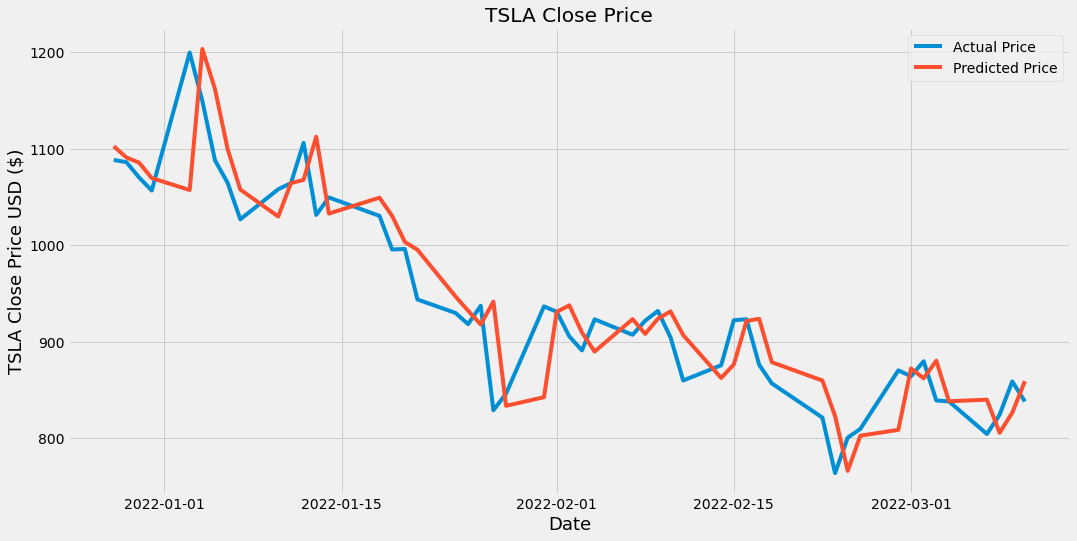

In [64]:
test_set_range = tesla_data[int(len(tesla_data)*0.8):].index
plt.figure(figsize=(16,8))

plt.plot(test_set_range, test_data, label='Actual Price')
plt.plot(test_set_range, model_predictions, label='Predicted Price')
plt.title("TSLA Close Price")
plt.xlabel('Date',fontsize=18)
plt.ylabel("TSLA Close Price USD ($)",fontsize=18)
#plt.xticks(np.arange(881,1259,50), tesla_data['DateTime'][881:1259:50])
plt.legend()
plt.show()





In [73]:
ARIMA=pd.DataFrame({"Actual":test_data})
ARIMA["Predicted"]=pd.DataFrame(model_predictions)
ARIMA.head()

,Actual,Predicted
0,1088.469971,1102.609871
1,1086.189941,1091.007091
2,1070.339966,1085.689602
3,1056.780029,1069.709483
4,1199.780029,1057.302124


ARIMA Testing Root Mean Squared Error is 42.82069467876911
LSTM Testing Root Mean Squared Error is 61.651275551675845


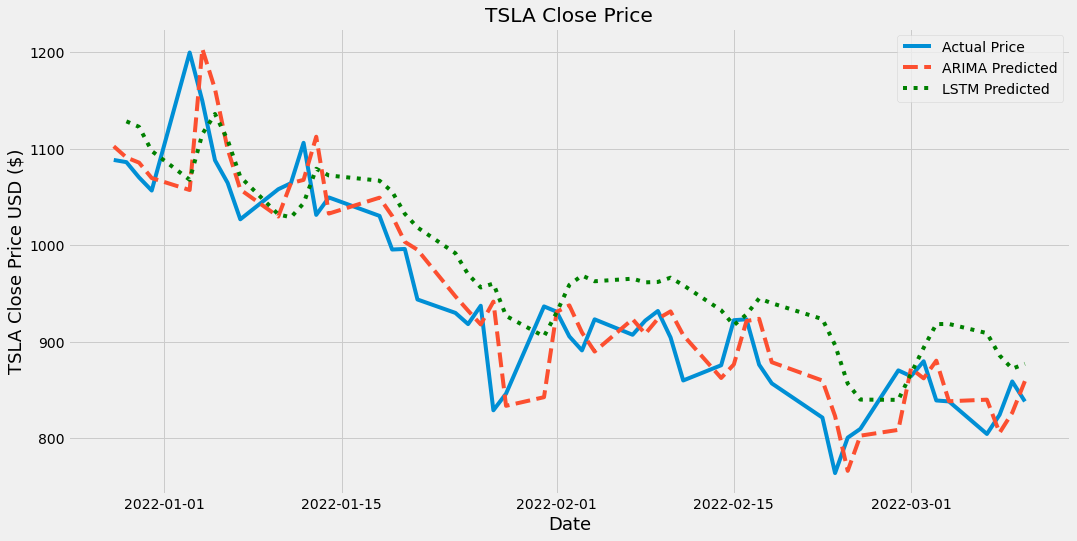

In [76]:
#2 models 
print('ARIMA Testing Root Mean Squared Error is {}'.format(Arima_RMSE))
print('LSTM Testing Root Mean Squared Error is {}'.format(LSTM_RMSE))
plt.figure(figsize=(16,8))

plt.plot(test_set_range, test_data, label='Actual Price')
plt.plot(test_set_range, model_predictions,linestyle='dashed', label='ARIMA Predicted')
plt.plot(LSTM['Predicted'],linestyle='dotted',color='green', label ='LSTM Predicted')
plt.title("TSLA Close Price")
plt.xlabel('Date',fontsize=18)
plt.ylabel("TSLA Close Price USD ($)",fontsize=18)

plt.legend()
plt.show()


### Based on the MSE and R2 value ARIMA has the better for TSLA. (might not be true for other stocks due to different price level swings. 


In [81]:
def getBetterModel(ArimaRMSE,LstmRMSE,ARIMA,LSTM): #deemed that RMSE is more important than R2
    if ArimaRMSE<LstmRMSE:
        print("ARIMA is Optimal")
        return ARIMA #data fram of predicted and actual
    else:
        print("LSTM is Optimal")
        return LSTM

In [82]:
Optimal = getBetterModel(Arima_RMSE,LSTM_RMSE,ARIMA,LSTM)
Optimal

ARIMA is Optimal


,Actual,Predicted
0,1088.469971,1102.609871
1,1086.189941,1091.007091
2,1070.339966,1085.689602
3,1056.780029,1069.709483
4,1199.780029,1057.302124
5,1149.589966,1203.467294
6,1088.119995,1161.932022
7,1064.699951,1099.729548
8,1026.959961,1057.793503
9,1058.119995,1029.850009
